# Learning the best linear estimator for a denoising problem

This is a brief demo of a method for learning the best linear estimator for a denoising problem with respect to the mean squared error. The demo is described in Section 6.2 of

* G. Holler,  ["How many samples are needed to reliably approximate the best linear estimator for a linear inverse problem?"](https://arxiv.org/abs/2107.00215), arXiv preprint arXiv:2107.00215, 2021.



In [1]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

We define the function ```rescaled_fashion_mnist``` which imports and loads the [Fashion MNIST image data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) data directly from TensorFlow.
Additionally, it rescales the fashion_mnist images such that the pixel values are between 0 and 1. This function
will later be used to initialize an instance of the ```SampledInverseProblem``` class.

In [2]:
def rescaled_fashion_mnist():
    '''Loads and rescales the fashion_mnist training and test images.
    
    Returns:
        X_train: ndarray of shape (60000, 28**2)
            The 60000 training images in vectorized form. 
        X_test: ndarray of shape (10000, 28**2)
            The 10000 test images in vectorized form.
    '''    
    fashion_mnist = keras.datasets.fashion_mnist
    (X_train, _), (X_test, _)  = fashion_mnist.load_data()

    X_train = np.reshape(
        X_train/255, 
        (X_train.shape[0], X_train.shape[1]*X_train.shape[2])
        )
    X_test = np.reshape(
        X_test/255, 
        (X_test.shape[0], X_test.shape[1]*X_test.shape[2])
        )
    return X_train, X_test

To create a denoising problem, we create an instance of the ```SampledInverseProblem``` class from the module ```invprob``` using the options:

- ```database=rescaled_fashion_mnist```: Chooses the rescaled Fashion MNIST database as a database.
- ```noiselevel='0.1'```: The noiselevel is such that the covariance of the noise $Z$ is $\text{noiselevel}^2 I$.
- ```noiselevel='uniform'```: Chooses uniform noise (also available: 'Gaussian').
 

In [3]:
from learn_lmmse import invprob

denoising_fashion_mnist = invprob.SampledInverseProblem(
                              database=rescaled_fashion_mnist,
                              noiselevel=0.1,
                              noise_type = 'uniform'
                              )

To perform the experiment we use the ```eval_gaussian_prediction``` method from our module ```evalmethod```.

In [4]:
from learn_lmmse import evalmethod as eval
import time

time_start = time.time()
data_denoising = eval.eval_gaussian_prediction(denoising_fashion_mnist, n_exp = 300)
print("needed time: %s seconds" % (time.time() - time_start))

needed time: 3283.3791239261627 seconds


To plot the empirical tail distribution of the mean squared error of the least squares estimator we use 
the ```plot_tail_fancy``` method from the module ```evalmethod```.

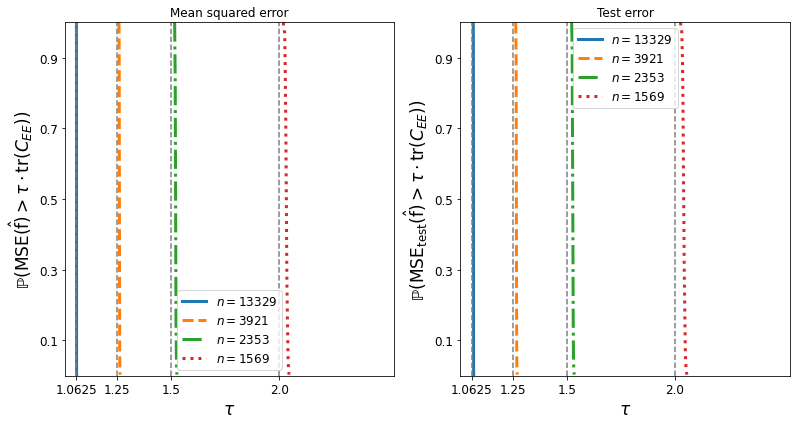

In [5]:
error_types = ['mse_', 'test_error_']
figsize=(6.5*len(error_types), 6.5)

fig, ax2d = plt.subplots(1,len(error_types), figsize=figsize, squeeze = False)
axli = ax2d.flatten()

for i in range(len(error_types)):
    
    eval.plot_tail_fancy(axli[i],
                         data_denoising, 
                         error_type= error_types[i],
                         fontsize=12,
                         labelsize=17,
                         tick_labelsize=12,
                         linewidth=3,
                         ) 
axli[0].set_title('Mean squared error')
axli[1].set_title('Test error')
    
plt.show()